In [11]:
def odd2prob(o):
    if o == float("inf"):
        return 1
    return o / (1 + o)

def prob2odd(p):
    if p == 0:
        return 0
    if p == 1:
        return float("inf")
    return p / (1 - p)

In [12]:
# guilty Oliver problem
bayes_factor = 0.01 / (0.6 * 2 * 0.01)
print(odd2prob(prob2odd(0.9) * bayes_factor))
print(odd2prob(prob2odd(0.1) * bayes_factor))
print(odd2prob(prob2odd(1) * bayes_factor))

0.8823529411764706
0.08474576271186442
1


In [13]:
import numpy as np
from empiricaldist import Pmf
import pandas as pd
from scipy.stats import norm, binom


<Axes: >

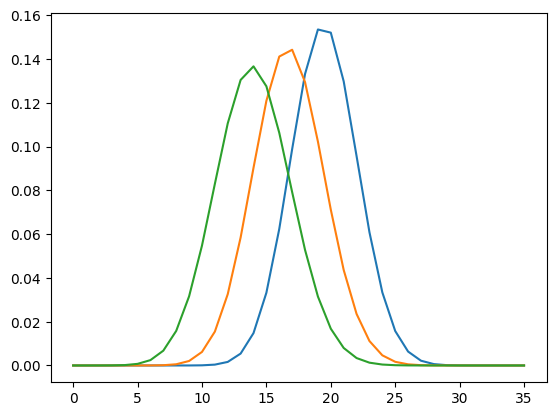

In [22]:
# gluten problem
def make_binom(n, p):
    qs = np.arange(0, n + 1)
    return Pmf(binom.pmf(qs, n, p), qs)
    
def gluten(n_total, n_sensitive, p_sensitive, p_insensitive):
    n_insensitive = n_total - n_sensitive
    report_gluten_true = make_binom(n_sensitive, p_sensitive)
    report_gluten_false = make_binom(n_insensitive, p_insensitive)
    dist = Pmf.add_dist(report_gluten_true, report_gluten_false)
    dist.normalize()
    return dist

pmf = gluten(35, 10, 0.95, 0.4)
pmf.plot()
pmf = gluten(35, 5, 0.95, 0.4)
pmf.plot()
pmf = gluten(35, 0, 0.95, 0.4)
pmf.plot()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41
3,3.333724e-05,9.326490e-06,2.205654e-06,4.377061e-07,7.398116e-08,1.107854e-08,1.517139e-09,1.942513e-10,2.361331e-11,2.754929e-12,...,2.784933e-29,2.596024e-30,2.410204e-31,2.229314e-32,2.054801e-33,1.887764e-34,1.728997e-35,1.579030e-36,1.438169e-37,1.306534e-38
4,1.777986e-04,6.138285e-05,1.841174e-05,4.734794e-06,1.038280e-06,1.962745e-07,3.288580e-08,5.013120e-09,7.095823e-10,9.468298e-11,...,3.089268e-27,2.998031e-28,2.893328e-29,2.777860e-30,2.654159e-31,2.524558e-32,2.391168e-33,2.255871e-34,2.120317e-35,1.985931e-36
5,7.349009e-04,3.018343e-04,1.100679e-04,3.516772e-05,9.735214e-06,2.324362e-06,4.825409e-07,8.893885e-08,1.487596e-08,2.300046e-09,...,2.625799e-25,2.657313e-26,2.669827e-27,2.664447e-28,2.642506e-29,2.605500e-30,2.555030e-31,2.492754e-32,2.420339e-33,2.339427e-34
6,2.449670e-03,1.166509e-03,5.017349e-04,1.926402e-04,6.524544e-05,1.930163e-05,4.967015e-06,1.118648e-06,2.241232e-07,4.069717e-08,...,1.778044e-23,1.879740e-24,1.969392e-25,2.046120e-26,2.109354e-27,2.158822e-28,2.194522e-29,2.216697e-30,2.225798e-31,2.222456e-32
7,6.765755e-03,3.664784e-03,1.817882e-03,8.174769e-04,3.296398e-04,1.179075e-04,3.707520e-05,1.020827e-05,2.472467e-06,5.337693e-07,...,9.845585e-22,1.089458e-22,1.192377e-23,1.291828e-24,1.386430e-25,1.474947e-26,1.556306e-27,1.629609e-28,1.694146e-29,1.749390e-30
8,1.578676e-02,9.584819e-03,5.389388e-03,2.782444e-03,1.306449e-03,5.521955e-04,2.079864e-04,6.922909e-05,2.028388e-05,5.249217e-06,...,4.540872e-20,5.270313e-21,6.037411e-22,6.832985e-23,7.647119e-24,8.469449e-25,9.289453e-26,1.009672e-26,1.088121e-27,1.163344e-28
9,3.157352e-02,2.123695e-02,1.335278e-02,7.790967e-03,4.183818e-03,2.049065e-03,9.064073e-04,3.586930e-04,1.259812e-04,3.911510e-05,...,1.767694e-18,2.156914e-19,2.591645e-20,3.070074e-21,3.589304e-22,4.145417e-23,4.733581e-24,5.348169e-25,5.982914e-26,6.631063e-27


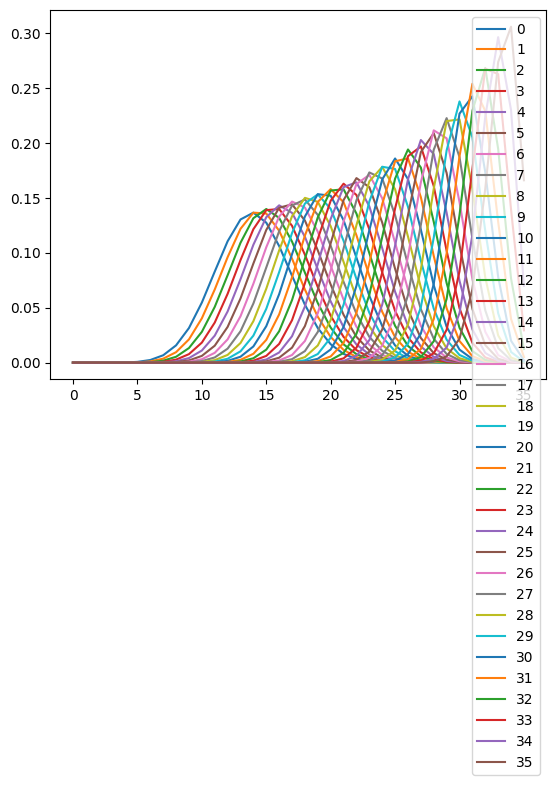

In [26]:
probs = pd.DataFrame()
for n in range(0, 35+1):
    probs[n] = gluten(35, n, 0.95, 0.4)
probs.plot()
probs # rows: number of real sensitive subjects,
      # cols: number of correctly reported cases,
      # value: probability of that happening

<Axes: >

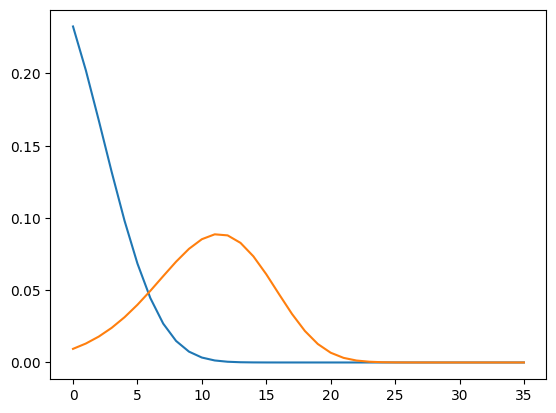

In [27]:
def test_gluten_hypos(n_total, n_correctly_reported):
    hypos = np.arange(0, n_total + 1)
    prior = Pmf(1, hypos)
    likelihood = probs.loc[n_correctly_reported]
    posterior = prior * likelihood
    posterior.normalize()
    return posterior

test_gluten_hypos(35, 12).plot()
test_gluten_hypos(35, 20).plot()

In [34]:
# elvis problem: elvis's twin brother died at birth. what's the probability he's an identical twin.
hypos = ['fraternal', 'identical']
prior = Pmf([2/3.0, 1/3.0], hypos)
likelihood = np.array([1, 2]) # likelihood Elvis is also male
posterior = prior * likelihood
likelihood = np.array([1, 1.25]) # death rate in each case
posterior = posterior * likelihood
posterior.normalize()
posterior

,probs
fraternal,0.444444
identical,0.555556


In [35]:
%%markdown
 seatle rain problem:
You're about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?

 seatle rain problem:
You're about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?


In [47]:
prior = Pmf(1, ["rain", "no rain"])
posterior = prior.copy()
rain_and_truth = binom.pmf(3, 3, 2/3)
no_rain_and_lie = binom.pmf(3, 3, 1/3)
rain_and_lie = binom.pmf(0, 3, 1/3) # did not happen
no_rain_and_truth = binom.pmf(0, 3, 2/3) # did not happen

likelihood = [rain_and_truth, no_rain_and_lie]

print(likelihood)

posterior *= likelihood
posterior.normalize()
posterior

[0.2962962962962962, 0.03703703703703703]


,probs
rain,0.888889
no rain,0.111111


In [46]:
binom.pmf(0, 3, 2/3) - 1/27

6.938893903907228e-18

In [48]:
# lung cancer problem
prior = Pmf([14, 100-14], ["smoker", "non-smoker"])
likelihood = [1, 25]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
smoker,0.00647
non-smoker,0.99353


<Axes: >

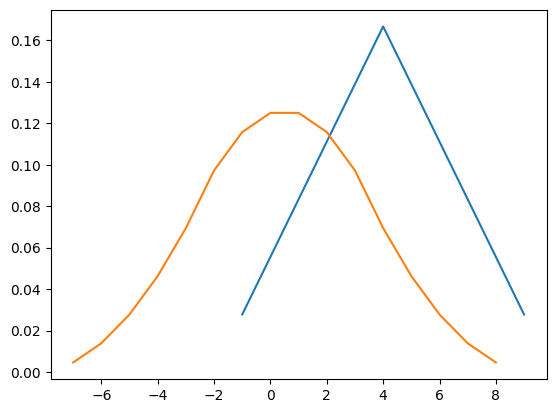

In [55]:
# dnd goblin
d6 = Pmf(1/6, range(1, 7))
max_hp = Pmf.add_dist(d6, d6)
curr_hp = Pmf.sub_dist(max_hp, 3)
curr_hp.plot()
next_hp = Pmf.sub_dist(curr_hp, d6)
next_hp.plot()

In [56]:
next_hp.prob_le(0)

0.5

,probs
d6,0.516129
d8,0.290323
d12,0.193548


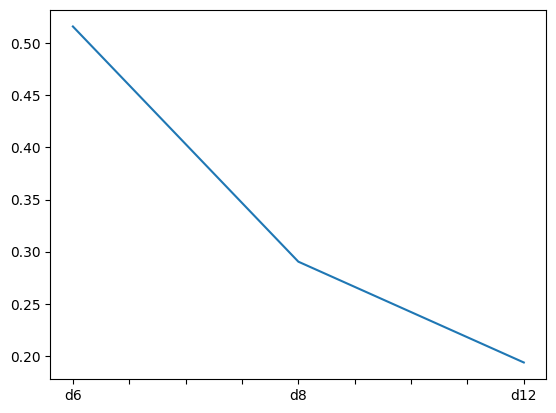

In [57]:
prior = Pmf(1, ['d6', 'd8', 'd12'])
d6 = Pmf(1/6, range(1,7))
d8 = Pmf(1/8, range(1,9))
d12 = Pmf(1/12, range(1,13))
likelihood = [
    Pmf.mul_dist(d6, d6)[12],
    Pmf.mul_dist(d8, d8)[12],
    Pmf.mul_dist(d12, d12)[12]
]
posterior = prior * likelihood
posterior.normalize()
posterior.plot()
posterior

<Axes: >

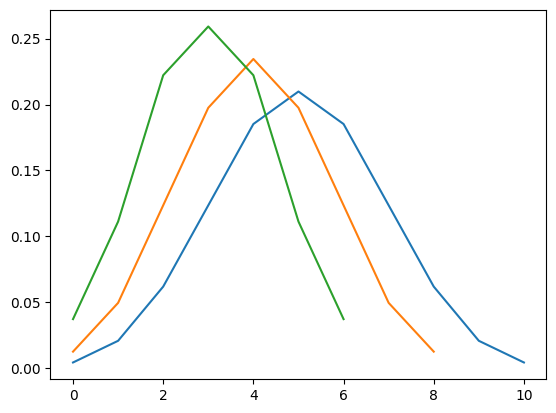

In [62]:
# betrayal at house on the hill problem
d3 = Pmf(1/3, range(3))
ob = Pmf.add_dist(Pmf.add_dist(d3, d3), d3)
mz = Pmf.add_dist(ob, d3)
pl = Pmf.add_dist(mz, d3)
pl.plot()
mz.plot()
ob.plot()

,probs
ob,0.314534
mz,0.449704
pl,0.235762


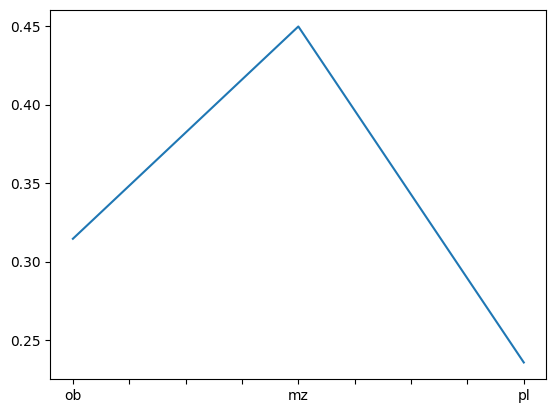

In [63]:
prior = Pmf(1, ['ob', 'mz', 'pl'])
posterior = prior.copy()
posterior *= [ob[3], mz[3], pl[3]]
posterior *= [ob[4], mz[4], pl[4]]
posterior *= [ob[5], mz[5], pl[5]]
posterior.normalize()
posterior.plot()
posterior

In [70]:
# us congress insider trade problem
n = 538
hypos = np.arange(0, n+1)
df = pd.DataFrame() # col: num of dishonest members; row: probability of X outperforming the market
for i in range(n + 1):
    honest = i
    dishonest = n - i
    honest_win = make_binom(honest, 0.5)
    dishonest_win = make_binom(dishonest, 0.9)
    total_win = Pmf.add_dist(honest_win, dishonest_win)
    df[i] = total_win

df

/tmp/ipykernel_2192905/801913003.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = total_win


,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.690262e-169,2.845131e-168,1.422566e-167,7.112828e-167,3.556414e-166,1.778207e-165,8.891035e-165,4.445517e-164,2.222759e-163,1.111379e-162
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.471060e-166,1.712769e-165,8.450040e-165,4.168117e-164,2.055607e-163,1.013578e-162,4.996762e-162,2.462817e-161,1.213626e-160,5.979221e-160
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.055094e-163,5.138677e-163,2.501852e-162,1.217638e-161,5.924025e-161,2.881069e-160,1.400631e-159,6.806487e-159,3.306331e-158,1.605421e-157
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.130937e-161,1.024496e-160,4.923007e-160,2.364425e-159,1.134985e-158,5.445247e-158,2.610972e-157,1.251231e-156,5.992616e-156,2.868352e-155
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.217103e-159,1.527002e-158,7.243163e-158,3.433398e-157,1.626373e-156,7.698540e-156,3.641509e-155,1.721198e-154,8.129219e-154,3.836421e-153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.269299e-19,7.471091e-20,4.394037e-20,2.582329e-20,1.516478e-20,8.899083e-21,5.218514e-21,3.058077e-21,1.790842e-21,1.048046e-21,...,7.166185e-151,4.008057e-151,2.241687e-151,1.253750e-151,7.012006e-152,3.921649e-152,2.193261e-152,1.226612e-152,6.859920e-153,3.836421e-153
535,8.541077e-21,4.956718e-21,2.874833e-21,1.666383e-21,9.653566e-22,5.589303e-22,3.234378e-22,1.870653e-22,1.081360e-22,6.247818e-23,...,5.439178e-153,3.037020e-153,1.695737e-153,9.468160e-154,5.286511e-154,2.951678e-154,1.648030e-154,9.201484e-155,5.137442e-155,2.868352e-155
536,4.302408e-22,2.461312e-22,1.407475e-22,8.045242e-23,4.596914e-23,2.625591e-23,1.499084e-23,8.555922e-24,4.881508e-24,2.784142e-24,...,3.090422e-155,1.722670e-155,9.602490e-156,5.352581e-156,2.983597e-156,1.663086e-156,9.270152e-157,5.167216e-157,2.880209e-157,1.605421e-157
537,1.442148e-23,8.131070e-24,4.583448e-24,2.583131e-24,1.455501e-24,8.199604e-25,4.618385e-25,2.600797e-25,1.464347e-25,8.243371e-26,...,1.168398e-157,6.501986e-158,3.618262e-158,2.013506e-158,1.120481e-158,6.235265e-159,3.469798e-159,1.930866e-159,1.074482e-159,5.979221e-160


0      6.665799e-84
1      1.614825e-83
2      3.906025e-83
3      9.433626e-83
4      2.274857e-82
           ...     
534    2.252782e-05
535    2.002858e-05
536    1.779023e-05
537    1.578756e-05
538    1.399754e-05
Length: 539, dtype: float64
431.4882114501996
430


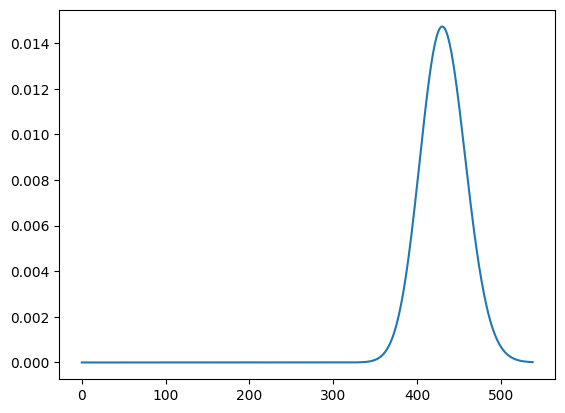

In [71]:
prior = Pmf(1, range(n + 1))
likelihood = df.loc[312]
posterior = prior * likelihood
posterior.normalize()
posterior.plot()
print(posterior)
print(posterior.mean())
print(posterior.mode())